In [49]:
import pandas as pd
import numpy as np

# Initial data review and cleaning

## Import a CSV file

In [127]:
df = pd.read_csv("../raw_data/AW18 W3 POST.csv")
df.head()

Code OP Com.               Libellé OP Com.              Vitrine collection  \
0          00A  AH2018 SELECTIF EARLY SEASON  18 S VET EARLY JRENF-RDC GRAPH   
1          00A  AH2018 SELECTIF EARLY SEASON  18 S VET EARLY AD_JOUR_MARIN D   
2          03A    AH2018 SELECTIF MID SEASON    18 S VET MID AD_ICONICOLOR 1   
3          03A    AH2018 SELECTIF MID SEASON  18 S VET MID JRBB-COLORAMAILLE   
4          03A    AH2018 SELECTIF MID SEASON   18 S VET MID JRENF-RDC PREPPY   

      Cible   Sous-cible Sexe Catégorie                         Famille  \
0  2-ENFANT        PETIT   MA      JOUR  FA GROSSES PIECES          VET   
1  3-ADULTE        FEMME   FE      JOUR  FA GROSSES PIECES          VET   
2  3-ADULTE        FEMME   FE      JOUR  FA GROSSES PIECES          VET   
3    1-BEBE  BEBE Debout   MA      JOUR  FA GROSSES PIECES          VET   
4  2-ENFANT        PETIT   FE      JOUR  FA GROSSES PIECES          VET   

                  Sous-Famille Macro catégorie  ... Semaine 1ère vte\nN  \
0  PARKAS                  VET     Enfant Jour  ...            2018-S29   
1  CIRES, COUPE VENT       VET     Adulte Jour  ...            2018-S29   
2  CIRES, COUPE VENT       VET     Adulte Jour  ...            2018-S42   
3  CIRES, COUPE VENT       VET     Bébé Debout  ...            2018-S34   
4  MANTEAUX                VET     Enfant Jour  ...            2018-S36   

   Défilement\nN Tx Ecoul\nCumul\nN Engagement global\nN  \
0           0.82               83 %                6,457   
1           0.44               49 %                2,878   
2           0.84               51 %                2,419   
3           1.43               62 %                3,712   
4           0.29               22 %                5,728   

  Tx Ecoul. sur Engt\nCumul\nN Stk Dispo\nEntrepot\nN  \
0                         52 %                     -1   
1                         57 %                      0   
2                         56 %                     -3   
3                         55 %                      0   
4                         16 %                      0   

  Stk hors Dispo\npour Réassort\nN  Stk Dispo\nRAL\nCdeGen\nN  \
0                              -55                          0   
1                                0                          0   
2                             -239                          0   
3                              -25                          0   
4                               -7                          0   

   Stk Dispo\npour Réassort\nN    %  
0                            0  30%  
1                            0  30%  
2                            0  30%  
3                            0  30%  
4                            0  30%  

[5 rows x 50 columns]

## clean up and replace column names

In [128]:
columns = list(df.columns)

In [129]:
renamed_columns = []
for c in columns:
    c = c.lower()
    c = c.replace("sem","")
    c = c.replace("\n","")
    c = c.replace("+","")
    c = c.replace(".","")
    c = c.replace("-","_")
    c = c.replace(" ","_")
    c = c.replace("é","e")
    c = c.replace("è","e")
    renamed_columns.append(c)

In [130]:
columns_dict = {c:r for c,r in zip(columns,renamed_columns)}

In [131]:
df.rename(columns = columns_dict, inplace = True)

In [132]:
df.drop(columns=["tx_ecouln","defilementn"], inplace = True)

## Import the rest of the CSVs and combine the dataframes

In [133]:
csv_files = ["AW19 W3 POST.csv","AW20 W2 POST.csv","SS18 W27 POST.csv","SS19 W27 POST.csv","SS21 W27 POST.csv"]

In [134]:
new_dfs = [df]
for csv in csv_files:
    # Read DF from CSV file
    add_df = pd.read_csv(f"../raw_data/{csv}")
    
    # Clean up and replace column names for each DF
    renamed_columns = []
    columns = list(add_df.columns)
    for c in columns:
        c = c.lower()
        c = c.replace("sem","")
        c = c.replace("\n","")
        c = c.replace("\r","")
        c = c.replace("+","")
        c = c.replace(".","")
        c = c.replace("-","_")
        c = c.replace(" ","_")
        c = c.replace("é","e")
        c = c.replace("è","e")
        renamed_columns.append(c)
    columns_dict = {c:r for c,r in zip(columns,renamed_columns)}
    add_df.rename(columns=columns_dict, inplace=True)
    
    # Drop columns that are duplicated
    add_df.drop(columns=["tx_ecouln","defilementn"], errors = "ignore", inplace = True)
    
    # Add to list of DFs to concatenate
    new_dfs.append(add_df)

In [135]:
data = pd.concat(new_dfs)

In [136]:
data.reset_index(inplace = True)

## Feature cleaning functions

### Fix comma decimal values

There are some features that use French style decimalisation. These commas need to be changed to full stops in order to convert columns to numeric dtype.

In [173]:
def replace_commas(text):
    text = str(text).replace(",",".")
    return text

### Remove commas

Several other numeric features contain commas as a place separator, also preventing conversion to numeric dtype. This function will remove the commas and strip any whitespace.

In [216]:
def remove_comma(text):
    text = text.replace(",","").strip()
    return text

### Change dashes to np.nan

The dataset contains quite a few rows were a dash ("-") has been added instead of a null value. Some of these may be imputable, but at this stage it these will be converted to np.nan to allow dtype conversion. They can be dropped or imputed during the next stages of analysis.

In [138]:
def make_dash_null(text):
    return np.nan if text == "-" else text

### Remove currency symbols

Several numeric features contain the symbol for EUR (€), preventing conversion to numeric dtype. This function will remove the symbol and strip any whitespace.

In [212]:
def remove_euro(text):
    text = text.replace("€","").strip()
    return text

## Initial Feature Review

In [209]:
renamed_columns[19:]

['ca_net_ttcn',
 'ca_net_ttc_1n',
 'ca_net_ttc_2n',
 'ca_net_ttc_3n',
 'qte_venduesn',
 'qte_vendues_1n',
 'qte_vendues_2n',
 'qte_vendues_3n',
 'taux_de_remisen',
 'taux_de_remise_1n',
 'stock_pdvn',
 'stk_transitn',
 'stock_pdv__transit',
 'couverturen',
 'defilementn',
 'ca_net_ttccumuln',
 'taux_de_remisecumuln',
 'qte_venduescumuln',
 'nb_rcten_venten',
 'nb_pdvavec_rc_en_venten',
 'vte_moyennesrct/point_de_venten',
 'aine_1ere_vten',
 'defilementn',
 'tx_ecoulcumuln',
 'engagement_globaln',
 'tx_ecoul_sur_engtcumuln',
 'stk_dispoentrepotn',
 'stk_hors_dispopour_reassortn',
 'stk_disporalcdegenn',
 'stk_dispopour_reassortn',
 '%']

### code_op_com

Product codes. Not valuable as an input feature. Drop from the dataframe.

In [140]:
columns_to_drop = ["code_op_com"]

### libelle_op_com

Year and season of the product. Inconsistent naming, so it's likely best to drop.

In [200]:
data.libelle_op_com.nunique()

78

In [201]:
columns_to_drop.append("libelle_op_com")

### vitrine_collection

Window display details. Inconsistent strings of text. Best to drop

In [196]:
data.vitrine_collection.nunique()

950

In [143]:
columns_to_drop.append("vitrine_collection")

### cible

"Target" - categorical feature split between baby, child, and adult. Null values to impute or drop.

In [194]:
data.cible.unique()

array(['2-ENFANT', '3-ADULTE', '1-BEBE', '-', nan], dtype=object)

In [195]:
data.cible.value_counts()

1-BEBE      5555
2-ENFANT    5194
3-ADULTE    2898
-             26
Name: cible, dtype: int64

### sous_cible

"Sub-target" category split into more granular items. May be worth encoding, but might also be too noisy.

In [192]:
data.sous_cible.unique()

array(['PETIT', 'FEMME', 'BEBE Debout', 'BEBE Couché', 'GRAND', 'HOMME',
       nan], dtype=object)

In [193]:
data.sous_cible.value_counts()

PETIT          4757
BEBE Debout    4109
FEMME          2608
BEBE Couché    1446
GRAND           463
HOMME           290
Name: sous_cible, dtype: int64

### sexe

Gender of the product - male/female/unisex. Relatively balanced categorical feature

In [190]:
data.sexe.unique()

array(['MA', 'FE', 'MI', nan], dtype=object)

In [191]:
data.sexe.value_counts()

FE    5604
MI    4769
MA    3300
Name: sexe, dtype: int64

### categorie

Categorical feature - apparel vertical. Potentially some imbalanced categories.

In [189]:
data.categorie.unique()

array(['JOUR', 'NUIT', 'SS VET', 'AISV', 'PUERICULTURE', 'ACCESSOIRES',
       'CHAUSSURES', nan], dtype=object)

In [188]:
data.categorie.value_counts()

JOUR            4957
SS VET          2404
AISV            2149
NUIT            2028
ACCESSOIRES     1840
PUERICULTURE     265
CHAUSSURES        30
Name: categorie, dtype: int64

### famille

More granular categorisation of products within their vertical. Highly variable text strings. Likely to drop.

In [187]:
data.famille.nunique()

77

In [153]:
columns_to_drop.append("famille")

### sous_famille

More granular categorisation of products within their family. Highly variable text strings. Likely to drop.

In [186]:
data.sous_famille.nunique()

183

In [155]:
columns_to_drop.append("sous_famille")

### macro_categorie

"Macro-category" - a combination of gender and category. May be colinear with other features, or a potential candidate for engineering a day/night feature.

In [184]:
data.macro_categorie.unique()

array(['Enfant Jour', 'Adulte Jour', 'Bébé Debout', 'Enfant Nuit',
       'Bébé Nuit', 'Enfant Sous-Vêt', 'Bébé couché', 'Adulte T-Shirt',
       'Bébé Sous-Vêt', 'Adulte Sous-Vêt', nan], dtype=object)

### nom_ref

Product name or reference. Not very useful as a learning feature, but can be used for frontend.

In [183]:
data.nom_ref.nunique()

5113

### refcol

Numeric reference to the product. Not likely to be significant. Add to drop list.

In [159]:
columns_to_drop.append("refcol")

### lib_refcol

Product text reference, typically a name and colour. Highly variable text field. Add to drop list.

In [181]:
data.lib_refcol

0        PARKA               CAPECO
1        CIRE                MARS [
2        COUPE VENT REVER    OGRE [
3         COUPE-VENT REVER.   JAUNE
4        Duffle coat         SMOKIN
                    ...            
13674          PYJACOURT     FLE/GR
13675          ECHARPE       MAR/SM
13676          COMBINAISON L MAR/TE
13677          MARINIERE     MAR/SM
13678                           NaN
Name: lib_refcol, Length: 13679, dtype: object

In [162]:
columns_to_drop.append("lib_refcol")

### coloris

The product colour(s). May be useful as an encoded categorical feature, but there are a lot of values.

In [180]:
data.coloris.value_counts().head(10)

varian    2113
SMOKIN    1137
MAR/MU     817
MARSHM     681
ECUME      546
SMO/MA     364
MAR/SM     316
TERKUI     226
NOIR [     224
JAUNE      215
Name: coloris, dtype: int64

### matiere

Product material. Similar to Coloris. May be usedful as a categorical feature, but would be difficult to encode so many unique values. 

In [179]:
data.matiere.value_counts()

COTE 1/1           3215
Côte 1/1           2515
AUTRES              915
JERSEY              852
Jersey              772
                   ... 
INTERL.GRAT.          1
BOU.EP.GRATTEE        1
Chambray              1
INTERLOCK DFACE       1
JERSEY GRAT.          1
Name: matiere, Length: 93, dtype: int64

### saisonnalite

Seasonality categorical feature - may be useful and seems easy to encode.

In [166]:
data.saisonnalite.value_counts()

Reconduit    5234
Eté          3555
Hiver        3281
Permanent    1603
Name: saisonnalite, dtype: int64

### pvc_france

Product price. Needs to be cleaned and converted to numeric.

In [168]:
data.pvc_france

0          99
1         139
2         129
3        69,9
4         149
         ... 
13674    22,9
13675    39,9
13676    39,9
13677    79,9
13678     NaN
Name: pvc_france, Length: 13679, dtype: object

In [175]:
data.pvc_france = data.pvc_france.map(replace_commas)

In [176]:
data.pvc_france = data.pvc_france.map(make_dash_null)

In [178]:
data.pvc_france = pd.to_numeric(data.pvc_france, errors = "coerce")

### rang

"Rank" - numeric feature. May be useful

<AxesSubplot:ylabel='Frequency'>

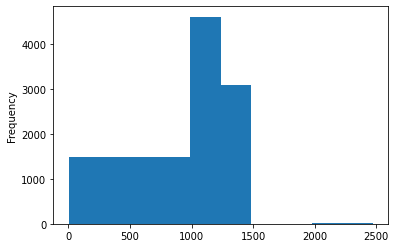

In [205]:
data.rang.plot(kind="hist")

### picto

Photo of the product. All values are nan. To drop.

In [208]:
columns_to_drop.append("picto")

### ca_net_ttcn

In [214]:
data.ca_net_ttcn = data.ca_net_ttcn.map(remove_euro)

In [217]:
data.ca_net_ttcn = data.ca_net_ttcn.map(remove_comma)

In [219]:
data.ca_net_ttcn = pd.to_numeric(data.ca_net_ttcn)